# Solar Energy Production Forecasting

We are creating a model that can predict solar energy production for every hour of the next day

TODO: 
- [ ] exploratory data analysis
- [ ] More than one prediction model
- [ ] Feature engineering 
- [ ] Model interpretation
- [ ] Create short notebook

functions ect. to load data.

In [2]:
import pandas as pd
import numpy as np
from functions import load_data, get_train_targets, get_test_data, prepare_submission, remove_ouliers

data_a, data_b, data_c = load_data(mean=True)

/Users/andreastallvik/Projects/tdt4173-project/functions.py:145: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby('time_hour').agg('mean').reset_index()
/Users/andreastallvik/Projects/tdt4173-project/functions.py:145: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby('time_hour').agg('mean').reset_index()
/Users/andreastallvik/Projects/tdt4173-project/functions.py:145: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shou

## Exploratory data analysis

#TODO: notes on features, data, ect.. show that we have looked at what the features are / do

We began by plotting the time-course data of pv_measurement for the different locations:

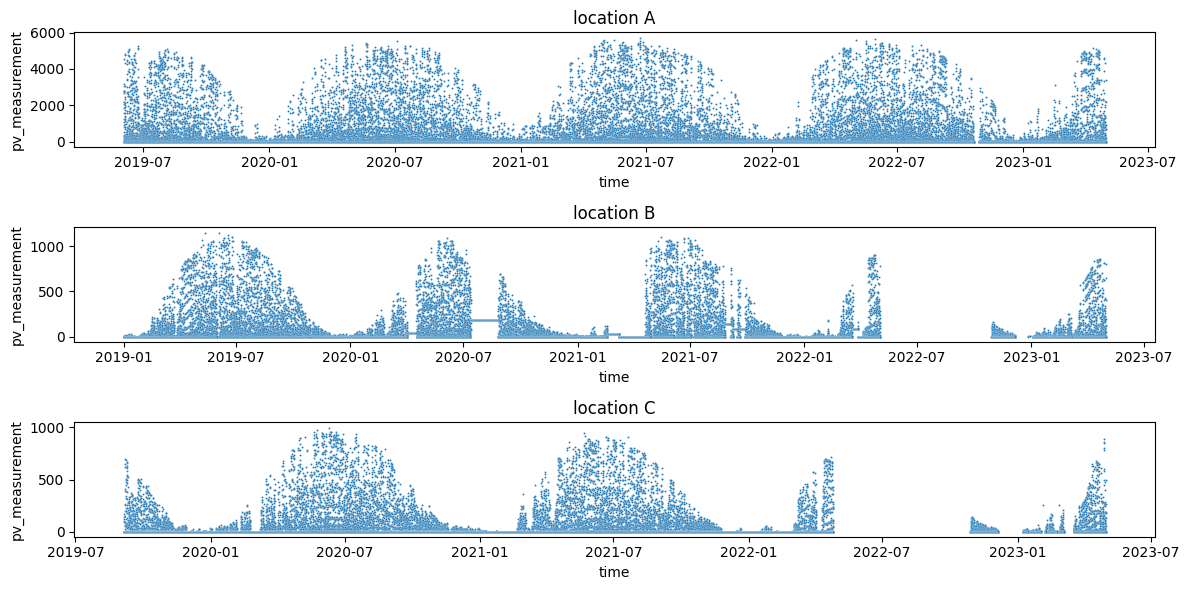

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create three Seaborn plots
plt.figure(figsize=(12, 6))

# Plot 1
plt.subplot(3, 1, 1)
sns.scatterplot(data=data_a, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location A")

# Plot 2
plt.subplot(3, 1, 2)
sns.scatterplot(data=data_b, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location B")

# Plot 3
plt.subplot(3, 1, 3)
sns.scatterplot(data=data_c, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location C")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- clearly there are some regions where the sensors are malfunctioning and giving static values for long time-spans
- these datapoints should be removed as outliers

In [1]:
# place the data outlier removal function here - then load the data again / or mofify the data

In [5]:
import pandas as pd
import numpy as np
from functions import load_data, get_train_targets, get_test_data, prepare_submission, remove_ouliers
import warnings

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

data_a, data_b, data_c = load_data(mean=True)

data_a = remove_ouliers(data_a)
data_b = remove_ouliers(data_b)
data_c = remove_ouliers(data_c)

X_train_a, targets_a = get_train_targets(data_a)
X_train_b, targets_b = get_train_targets(data_b)
X_train_c, targets_c = get_train_targets(data_c)

X_test_a, X_test_b, X_test_c = get_test_data(mean=True)

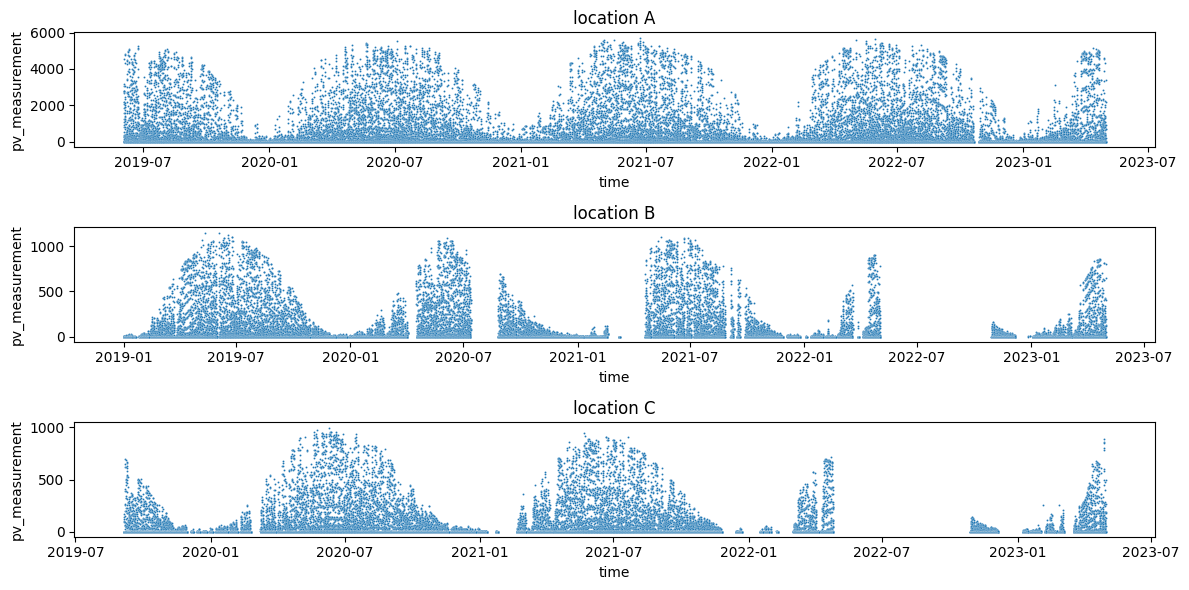

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create three Seaborn plots
plt.figure(figsize=(12, 6))

# Plot 1
plt.subplot(3, 1, 1)
sns.scatterplot(data=data_a, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location A")

# Plot 2
plt.subplot(3, 1, 2)
sns.scatterplot(data=data_b, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location B")

# Plot 3
plt.subplot(3, 1, 3)
sns.scatterplot(data=data_c, x="time", y="pv_measurement", markers=".", s=2)
plt.title("location C")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- this is looking better: there are fewer datapoints, but the model will not be trainied on defect data

### NaN values:

In [15]:
print("Columns with null values for location A:")
nan_counts = data_a.isna().sum()
columns_with_nan = nan_counts[nan_counts > 1]
print(columns_with_nan)

print("Columns with null values for location B:")
nan_counts = data_b.isna().sum()
columns_with_nan = nan_counts[nan_counts > 1]
print(columns_with_nan)

print("Columns with null values for location C:")
nan_counts = data_c.isna().sum()
columns_with_nan = nan_counts[nan_counts > 1]
print(columns_with_nan)

Columns with null values for location A:
ceiling_height_agl:m     6127
cloud_base_agl:m         2363
snow_density:kgm3       32898
dtype: int64
Columns with null values for location B:
ceiling_height_agl:m     4280
cloud_base_agl:m         1887
snow_density:kgm3       26028
dtype: int64
Columns with null values for location C:
ceiling_height_agl:m     4439
cloud_base_agl:m         1874
snow_density:kgm3       21763
dtype: int64


- **ceiling_height_agl:m** is the height of the lowest cloud layer covering more than half of the sky or where clouds are present above 6000m. NaN values are presumably when there is no cloud cover.  
Can fill NaN values with ...

- **cloud_base_agl:m** is the lowest altitude of the visible portion of a cloud. It is persumably NaN when there are no clouds.  
Can fill Nan values with ...

- **snow_density:kgm3** Is the density of snow, it is presumably NaN when there is no snow present.  
Can fill NaN values with 0.

In [20]:
data_a.fillna(0, inplace=True)
data_b.fillna(0, inplace=True)
data_c.fillna(0, inplace=True)

### Correlations:

In [21]:
corrA = data_a.drop(columns=["time"], inplace=False).corr()
corrB = data_b.drop(columns=["time"], inplace=False).corr()
corrC = data_c.drop(columns=["time"], inplace=False).corr()

In [22]:
corrA["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.867393
direct_rad_1h:J                   0.853126
clear_sky_rad:W                   0.811622
clear_sky_energy_1h:J             0.798904
diffuse_rad:W                     0.708429
diffuse_rad_1h:J                  0.700965
sun_elevation:d                   0.688090
is_day:idx                        0.556152
t_1000hPa:K                       0.348717
dew_point_2m:K                    0.247386
visibility:m                      0.245714
absolute_humidity_2m:gm3          0.237441
pressure_100m:hPa                 0.182475
msl_pressure:hPa                  0.181997
pressure_50m:hPa                  0.177525
sfc_pressure:hPa                  0.172568
cloud_base_agl:m                  0.130456
ceiling_height_agl:m              0.067585
wind_speed_w_1000hPa:ms          -0.005185
snow_melt_10min:mm               -0.010881
sun_azimuth:d                    -0.016345
prob_rime:p                      -0.043528
fresh_snow_

In [23]:
corrB["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.868000
clear_sky_rad:W                   0.860109
direct_rad_1h:J                   0.855117
clear_sky_energy_1h:J             0.848017
diffuse_rad:W                     0.737773
diffuse_rad_1h:J                  0.732356
sun_elevation:d                   0.695024
is_day:idx                        0.521091
t_1000hPa:K                       0.410787
dew_point_2m:K                    0.297148
absolute_humidity_2m:gm3          0.294391
pressure_100m:hPa                 0.189512
pressure_50m:hPa                  0.184131
msl_pressure:hPa                  0.180570
sfc_pressure:hPa                  0.178770
cloud_base_agl:m                  0.177519
visibility:m                      0.145914
ceiling_height_agl:m              0.106422
snow_drift:idx                   -0.004760
wind_speed_w_1000hPa:ms          -0.006856
sun_azimuth:d                    -0.015221
snow_melt_10min:mm               -0.018012
prob_rime:p

In [24]:
corrC["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.867283
direct_rad_1h:J                   0.866060
clear_sky_rad:W                   0.858148
clear_sky_energy_1h:J             0.853946
diffuse_rad:W                     0.730149
diffuse_rad_1h:J                  0.728709
sun_elevation:d                   0.704098
is_day:idx                        0.534027
t_1000hPa:K                       0.417736
dew_point_2m:K                    0.287102
absolute_humidity_2m:gm3          0.271615
visibility:m                      0.204124
pressure_100m:hPa                 0.173054
msl_pressure:hPa                  0.170684
pressure_50m:hPa                  0.167359
sfc_pressure:hPa                  0.161651
cloud_base_agl:m                  0.119035
ceiling_height_agl:m              0.082450
wind_speed_w_1000hPa:ms           0.011770
sun_azimuth:d                     0.010127
snow_melt_10min:mm               -0.015437
dew_or_rime:idx                  -0.015892
snow_depth:

### Features to drop:
- **elevation:m**: only sepperates between locations A, B, C. Since we are training sepperate models for the 3 locations, it makes no sense to keep this.

### Features to add:
- **month**: 1 - 12 for which month

In [ ]:
# code for adding month